Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import warnings
import pickle
from PIL import Image

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
# from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

warnings.filterwarnings("ignore")

In [2]:
# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


## Exercício 1 - Treinamento do modelo baseado em árvore de decisão

In [3]:
mnist = load_digits()
# mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
# y = y.astype(np.int8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data shape:", X_train.shape, X_test.shape)
print("Labels shape:", y_train.shape, y_test.shape)

Data shape: (1437, 64) (360, 64)
Labels shape: (1437,) (360,)


In [4]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  # para classificação multiclasse
    'num_class': 10,               # número de classes
    'max_depth': 6,                # profundidade máxima da árvore
    'eta': 0.3,                    # taxa de aprendizado
    'subsample': 0.8,              # taxa de amostragem
    'colsample_bytree': 0.8        # taxa de amostragem de colunas
}

num_round = 300
xgb_clf = xgb.train(params, dtrain, num_round)

y_pred_xgb = xgb_clf.predict(dtest)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia: {accuracy_xgb * 100:.2f}%')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))

Acurácia: 97.78%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       0.97      1.00      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble

In [5]:
clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rfc.fit(X_train, y_train)

y_pred_rfc = clf_rfc.predict(X_test)

accuracy_rf  = accuracy_score(y_test, y_pred_rfc)
print(f'Acurácia: {accuracy_rf * 100:.2f}%')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rfc))

Acurácia: 97.22%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [6]:
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.fit(X_train, y_train)

y_pred_dtc = clf_dtc.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dtc)
print(f'Acurácia: {accuracy_dt * 100:.2f}%')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dtc))


Acurácia: 84.17%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [7]:
clf_gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

clf_gbc.fit(X_train, y_train)

y_pred_gbc = clf_gbc.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gbc)
print(f'Acurácia: {accuracy_gb * 100:.2f}%')

Acurácia: 96.94%


In [8]:
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')
print(f'Acurácia do modelo de árvore de decisão simples: {accuracy_dt:.4f}')
print(f'Acurácia do modelo Gradient Boosting: {accuracy_gb:.4f}')

Acurácia do modelo XGBoost: 0.9778
Acurácia do modelo Random Forest: 0.9722
Acurácia do modelo de árvore de decisão simples: 0.8417
Acurácia do modelo Gradient Boosting: 0.9694


## Exercício 3 - Visualização da árvore de decisão e Medida de Impureza

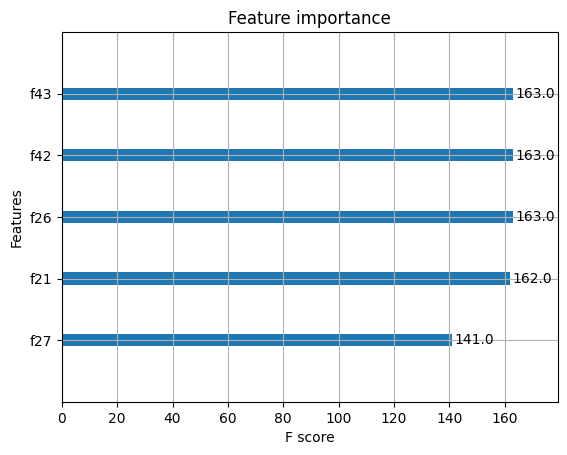

In [9]:
xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=5)
plt.show()


<Figure size 2000x1000 with 0 Axes>

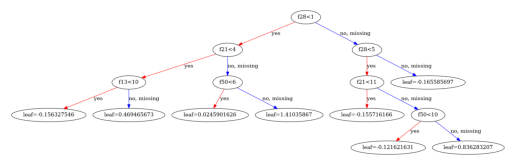

In [10]:
plt.figure(figsize=(20, 10))
xgb.plot_tree(xgb_clf, num_trees=0)
plt.show()


In [11]:
bst_tree = xgb.to_graphviz(xgb_clf, num_trees=0)
bst_tree.render('bst_tree', format='png')

'bst_tree.png'

In [12]:
def plot_image(image, label):
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()


Previsão para a imagem: 5
Label verdadeiro: 5


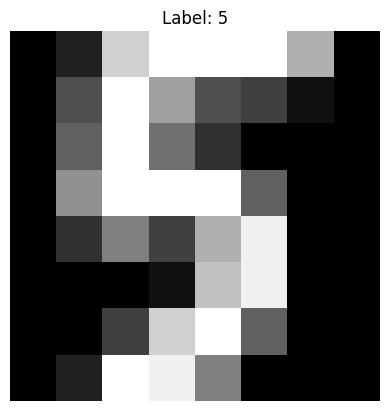

In [13]:
image_index = 32
image_data = X[image_index]

processed_image = np.expand_dims(image_data, axis=0)

dimage = xgb.DMatrix(processed_image)

y_pred_image = xgb_clf.predict(dimage)
print(f'Previsão para a imagem: {int(y_pred_image[0])}')

true_label = y[image_index]
print(f'Label verdadeiro: {true_label}')

plot_image(X[image_index], y[image_index])

In [14]:
with open('xgb_clf.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)

print("Modelo XGBoost salvo com sucesso em 'xgb_clf.pkl'")

Modelo XGBoost salvo com sucesso em 'xgb_clf.pkl'


In [15]:
with open('xgb_clf.pkl', 'rb') as file:
    xgb_clf_pkl = pickle.load(file)

In [16]:
def preprocess_image(image_path: str) -> np.ndarray:
    image = Image.open(image_path)
    image = image.resize((8, 8))
    image = image.convert('L')
    image_array = np.array(image)
    image_array = image_array / 16.0
    image_array = image_array.flatten()
    return image_array

def predict_image(image_array: np.ndarray) -> int:
    dmatrix = xgb.DMatrix([image_array])
    prediction = xgb_clf_pkl.predict(dmatrix)
    return int(prediction[0])

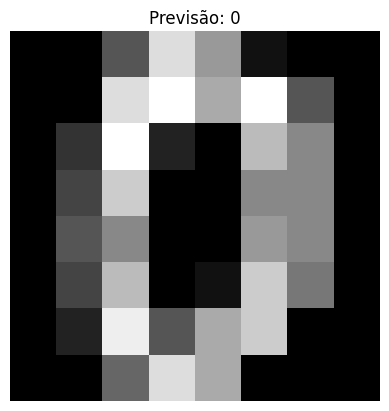

A previsão para a imagem é: 0


In [18]:
image_path = "/workspaces/mba-deeplearning-iad-006-2024-public/imagens/imagem_positiva.png"

image_array = preprocess_image(image_path)

prediction = predict_image(image_array)

plt.imshow(Image.open(image_path))
plt.title(f'Previsão: {prediction}')
plt.axis('off')
plt.show()

print(f'A previsão para a imagem é: {prediction}')
